In [1]:
!pip install tensorflow keras numpy matplotlib pillow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
def load_images(dataset_path, img_size=(64, 64)):
    images = []
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('jpg', 'png', 'jpeg')):
                img_path = os.path.join(root, file)
                img = Image.open(img_path).resize(img_size)
                img = np.array(img) / 255.0  # Normalize to [0, 1]
                images.append(img)
    return np.array(images)


dataset_path = 'dataset/'
images = load_images(dataset_path)
print(f"Loaded {len(images)} images of shape {images[0].shape}")

In [1]:
!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [ ]:
def build_discriminator(img_shape):
    model = tf.keras.Sequential()


    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
latent_dim = 100
img_shape = (64, 64, 3)

discriminator = build_discriminator(img_shape)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

generator = build_generator(latent_dim)

discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        real_images = images[np.random.randint(0, images.shape[0], batch_size)]
        real_labels = np.ones((batch_size, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if step % 100 == 0:
            print(f"{step}/{steps_per_epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

    if epoch % 10 == 0:
        noise = np.random.normal(0, 1, (5, latent_dim))
        generated_images = generator.predict(noise)
        plt.figure(figsize=(10, 2))
        for i in range(5):
            plt.subplot(1, 5, i + 1)
            plt.imshow((generated_images[i] + 1) / 2)  # Rescale to [0, 1]
            plt.axis('off')
        plt.show()

In [3]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
prompt = "an eagle in the sky"
image  = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

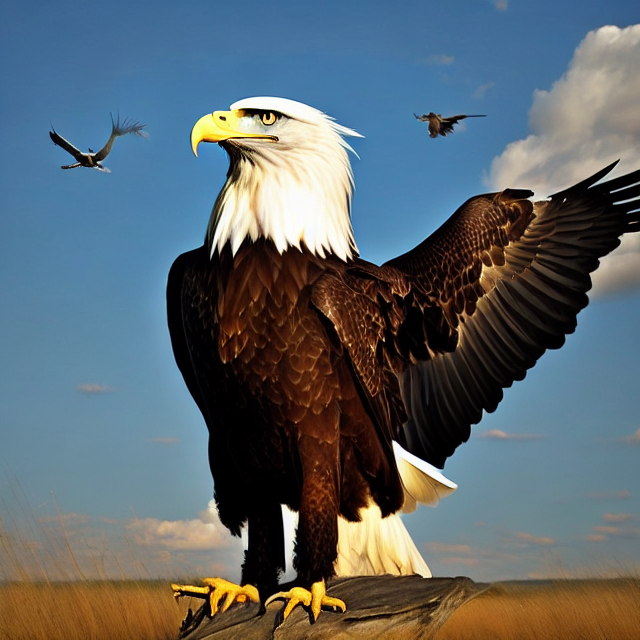

In [8]:
image

[PROMPT]:  layasan albatross with dark sky


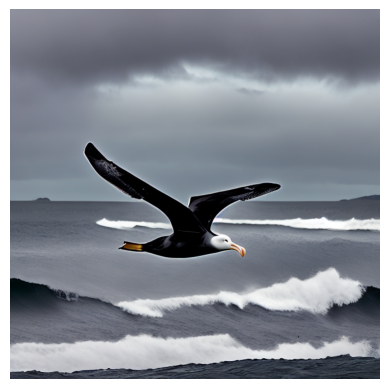

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [6]:
prompt2 = "a rose flower "

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

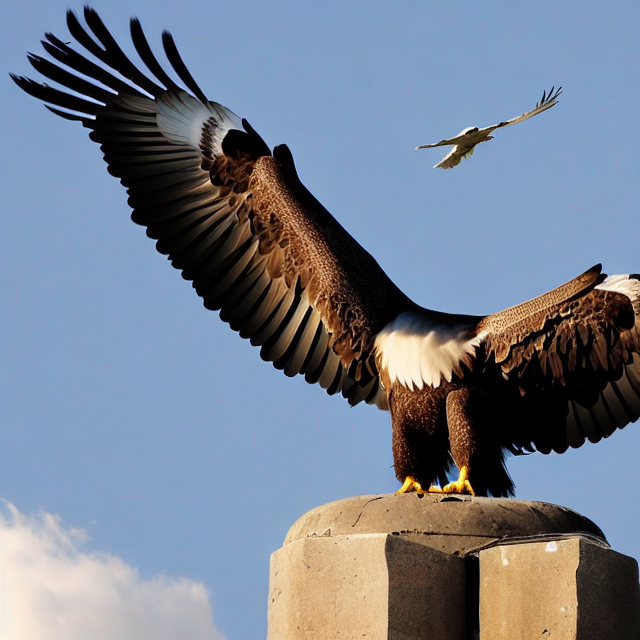

In [ ]:
image